<a href="https://colab.research.google.com/github/FreddyR424/Deep_Learning/blob/master/CIFAR_10_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **CIFAR-10 Image Classification**

## **Context**
- CIFAR-10 (Canadian Institute For Advanced Research) is a collection of images with 10 different classes representing airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. CIFAR-10 is a set of images that can be used to teach a computer how to recognize objects.

## **Objective**
- build a multi-class classification algorithm to predict 10 different classes of the CIFAR-10 dataset using Convolutional Neural Networks and Transfer Learning.

## **Dataset**
- The CIFAR-10 dataset consists of 60000 32x32x3, i.e., color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

## **Importing / Loading Libraries**

In [1]:
import keras
import numpy as np
# A library for data visualization
import matplotlib.pyplot as plt
# An advanced library for data visualization
import seaborn as sns
import tensorflow as tf
# Keras Sequential Model
from tensorflow.keras.models import Sequential
# Importing all the different layers and optimizer
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU
from tensorflow.keras.optimizers import Adam

## **Importing and loading the CIFAR dataset**

In [2]:
# Importing the dataset
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# Checking the shape of the dataset
x_train.shape

(50000, 32, 32, 3)

-  the data is stored in a 4-dimensional NumPy array. The first dimension 50000 is denoting the number of images in the training data, and each image is stacked on top of the other as a 3-dimensional NumPy array. The second dimension 32 is denoting the number of pixels along the x-axis, the third dimension 32 is denoting the number of pixels along the y-axis, and the fourth dimension 3 is the total number of channels in those images

In [4]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [5]:
y_train[0]

array([6], dtype=uint8)

- The target labels are encoded in numerical format. Here, encoding 6 denotes the category frog. We will create a list of category names to convert the number to its original category name.

In [6]:
# Checking the shape of the test data
x_test.shape

(10000, 32, 32, 3)

- There are 10,000 images in the test data.

## **Converting NumPy arrays to images and visualizing some random images**

In [7]:
# Declaring the number of classes
num_classes = 10

# Creating a list of category names in alphabetical order
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

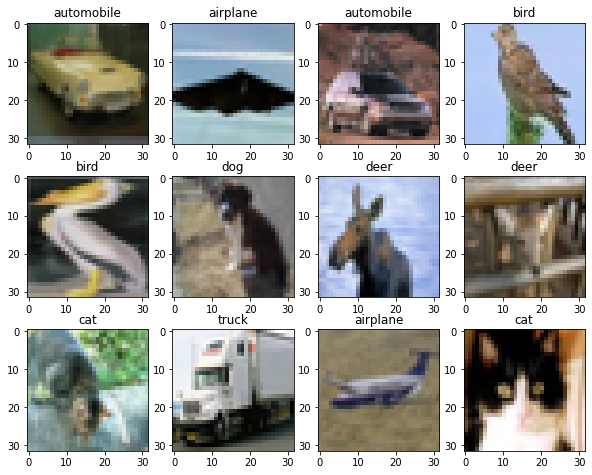

In [8]:
# Declaring the number of rows
rows = 3

# Declaring the number of columns
cols = 4

fig = plt.figure(figsize = (10, 8))

for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.imshow(x_train[random_index, :])
        ax.set_title(cifar10_classes[y_train[random_index, 0]])

# Display the plot
plt.show()

## **Data Preparation**

In [9]:
# Normalizing the image pixels
x_train_normalized = x_train/255
x_test_normalized = x_test/255

In [10]:
# Creating one-hot encoded representation of target labels
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

## **Model Building**
- create a CNN model sequentially where we will be adding the layers one after another.

In [11]:
# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [12]:
# Initialized a sequential model
model_1 = Sequential()

# Adding the first convolutional layer with 16 filters and the kernel size of 3x3, and 'same' padding

# The input_shape denotes input dimension of CIFAR images
model_1.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (32, 32, 3)))

# Adding LeakyRelu activation function with a negative slope of 0.1
model_1.add(LeakyReLU(0.1))

# Adding the second convolutional layer with 32 filters and the kernel size of 3x3
model_1.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))

# Adding LeakyRelu activation function with a negative slope of 0.1
model_1.add(LeakyReLU(0.1))
    
# Adding max pooling to reduce the size of the output of second convolutional layer
model_1.add(MaxPooling2D(pool_size = (2, 2)))
    
# Flattening the 3-d output of the convolutional layer after max pooling to make it ready for creating dense connections
model_1.add(Flatten())

# Adding a fully connected dense layer with 256 neurons    
model_1.add(Dense(256))

# Adding LeakyRelu activation function with a negative slope of 0.1
model_1.add(LeakyReLU(0.1))

# Adding the output layer with 10 neurons and 'softmax' activation function (for a multi-class classification problem)
model_1.add(Dense(10, activation = 'softmax'))

In [13]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                        

- CNN model will train and learn 2,105,066 parameters (weights and biases).

In [14]:
model_1.compile(
    loss = 'categorical_crossentropy',
    # Using Adam optimizer with 0.005 learning rate, by default it is 0.001
    optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.005),   
    metrics=['accuracy']
)

In [15]:
history_1 = model_1.fit(
            x_train_normalized, y_train_encoded,
            epochs = 10,
            validation_split = 0.1,
            shuffle = True,
            verbose = 2)

Epoch 1/10
1407/1407 - 130s - loss: 1.3561 - accuracy: 0.5161 - val_loss: 1.0540 - val_accuracy: 0.6272 - 130s/epoch - 92ms/step
Epoch 2/10
1407/1407 - 121s - loss: 0.9227 - accuracy: 0.6750 - val_loss: 0.9214 - val_accuracy: 0.6838 - 121s/epoch - 86ms/step
Epoch 3/10
1407/1407 - 121s - loss: 0.6893 - accuracy: 0.7572 - val_loss: 0.8996 - val_accuracy: 0.6996 - 121s/epoch - 86ms/step
Epoch 4/10
1407/1407 - 119s - loss: 0.4754 - accuracy: 0.8358 - val_loss: 0.9867 - val_accuracy: 0.6916 - 119s/epoch - 85ms/step
Epoch 5/10
1407/1407 - 122s - loss: 0.2799 - accuracy: 0.9059 - val_loss: 1.1120 - val_accuracy: 0.7000 - 122s/epoch - 87ms/step
Epoch 6/10
1407/1407 - 122s - loss: 0.1510 - accuracy: 0.9491 - val_loss: 1.4249 - val_accuracy: 0.6984 - 122s/epoch - 86ms/step
Epoch 7/10
1407/1407 - 120s - loss: 0.0847 - accuracy: 0.9730 - val_loss: 1.6739 - val_accuracy: 0.6974 - 120s/epoch - 85ms/step
Epoch 8/10
1407/1407 - 120s - loss: 0.0506 - accuracy: 0.9845 - val_loss: 1.8719 - val_accuracy: 

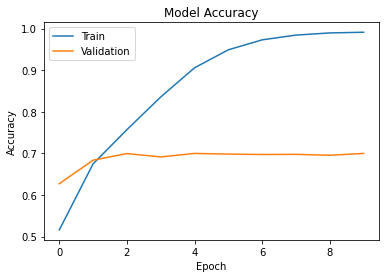

In [16]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
# Display the plot
plt.show()

-  the model has done poorly on the validation data. The model is highly overfitting the training data.
The validation accuracy has become more or less constant after 2 epochs.

In [17]:
# Clearing the backend
from tensorflow.keras import backend
backend.clear_session()

In [18]:
# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [19]:
# Initialized a sequential model
model_2 = Sequential()

# Adding the first convolutional layer with 16 filters and the kernel size of 3x3, and 'same' padding

# The input_shape denotes the input dimension of CIFAR images
model_2.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (32, 32, 3)))

# Adding LeakyRelu activation function with a negative slope of 0.1
model_2.add(LeakyReLU(0.1))

# Adding dropout to randomly switch off 20% neurons to reduce overfitting
model_2.add(Dropout(0.2))

# Adding the second convolutional layer with 32 filters and the kernel size of 3x3
model_2.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))

# Adding LeakyRelu activation function with a negative slope of 0.1
model_2.add(LeakyReLU(0.1))

# Adding dropout to randomly switch off 20% neurons to reduce overfitting
model_2.add(Dropout(0.2))
    
# Adding max pooling to reduce the size of output of second convolutional layer
model_2.add(MaxPooling2D(pool_size = (2, 2)))
    
# Flattening the 3-d output of the convolutional layer after max pooling to make it ready for creating dense connections
model_2.add(Flatten())

# Adding a fully connected dense layer with 256 neurons    
model_2.add(Dense(256))

# Adding LeakyRelu activation function with a negative slope of 0.1
model_2.add(LeakyReLU(0.1))

# Adding dropout to randomly switch off 50% neurons to reduce overfitting
model_2.add(Dropout(0.5))

# Adding the output layer with 10 neurons and 'softmax'  activation function since this is a multi-class classification problem
model_2.add(Dense(10, activation = 'softmax'))

In [20]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 dropout (Dropout)           (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0

In [30]:
# Compiling the model
model_2.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.005),
    metrics=['accuracy'])

In [31]:
# Fitting the model
history_2 = model_2.fit(
            x_train_normalized, y_train_encoded,
            epochs = 10,
            validation_split = 0.1,
            shuffle = True,
            verbose = 2)

Epoch 1/10
1407/1407 - 146s - loss: 0.4340 - accuracy: 0.8519 - val_loss: 1.1168 - val_accuracy: 0.6590 - 146s/epoch - 104ms/step
Epoch 2/10
1407/1407 - 149s - loss: 0.4543 - accuracy: 0.8403 - val_loss: 1.1771 - val_accuracy: 0.6630 - 149s/epoch - 106ms/step
Epoch 3/10
1407/1407 - 145s - loss: 0.3950 - accuracy: 0.8598 - val_loss: 1.1507 - val_accuracy: 0.6822 - 145s/epoch - 103ms/step
Epoch 4/10
1407/1407 - 148s - loss: 0.3672 - accuracy: 0.8695 - val_loss: 1.2157 - val_accuracy: 0.6656 - 148s/epoch - 105ms/step
Epoch 5/10
1407/1407 - 151s - loss: 0.3395 - accuracy: 0.8800 - val_loss: 1.4368 - val_accuracy: 0.6352 - 151s/epoch - 107ms/step
Epoch 6/10
1407/1407 - 150s - loss: 0.3235 - accuracy: 0.8858 - val_loss: 1.1765 - val_accuracy: 0.6844 - 150s/epoch - 106ms/step
Epoch 7/10
1407/1407 - 150s - loss: 0.3003 - accuracy: 0.8955 - val_loss: 1.4258 - val_accuracy: 0.6722 - 150s/epoch - 107ms/step
Epoch 8/10
1407/1407 - 147s - loss: 0.2930 - accuracy: 0.8977 - val_loss: 1.2699 - val_acc

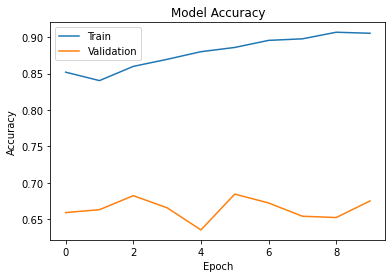

In [32]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
# Display the plot
plt.show()

In [33]:

# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [34]:
# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [35]:
# Initialized a sequential model
model_3 = Sequential()

# Adding the first convolutional layer with 16 filters and the kernel size of 3x3, and 'same' padding

# The input_shape denotes input dimension of CIFAR images
model_3.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (32, 32, 3)))

# Adding LeakyRelu activation function with a negative slope of 0.1
model_3.add(LeakyReLU(0.1))

# Adding the second convolutional layer with 32 filters and the kernel size of 3x3
model_3.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))

# Adding LeakyRelu activation function with a negative slope of 0.1
model_3.add(LeakyReLU(0.1))
    
# Adding max pooling to reduce the size of output of the second convolutional layer
model_3.add(MaxPooling2D(pool_size = (2, 2)))
    
# Adding dropout to randomly switch off 25% of the network to reduce overfitting
model_3.add(Dropout(0.25))
    
# Adding the third convolutional layer with 32 filters and the kernel size of 3x3
model_3.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))

# Adding LeakyRelu activation function with a negative slope of 0.1
model_3.add(LeakyReLU(0.1))

# Adding the fourth convolutional layer with 64 filters and the kernel size of 3x3
model_3.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same'))

# Adding LeakyRelu activation function with a negative slope of 0.1
model_3.add(LeakyReLU(0.1))

# Adding max pooling to reduce the size of output of the fourth convolutional layer    
model_3.add(MaxPooling2D(pool_size = (2, 2)))
    
# Adding dropout to randomly switch off 25% of the network to reduce overfitting
model_3.add(Dropout(0.25))

# Flattening the 3-d output of the convolutional layer after max pooling to make it ready for creating dense connections
model_3.add(Flatten())

# Adding a fully connected dense layer with 256 neurons    
model_3.add(Dense(256))

# Adding LeakyRelu activation function with negative slope of 0.1
model_3.add(LeakyReLU(0.1))
    
# Adding dropout to randomly switch off 50% of dense layer neurons to reduce overfitting
model_3.add(Dropout(0.5))

# Adding the output layer with 10 neurons and 'softmax' activation function since this is a multi-class classification problem
model_3.add(Dense(10, activation = 'softmax'))

In [36]:
# Summary of the model
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                        

- the number of convolutional layers has increased, but the total number of trainable parameters has reduced significantly (~ 50%). This is due to the addition of a few max-pooling layers in between.

In [37]:
model_3.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.001),
    metrics = ['accuracy'])

In [38]:
history_3 = model_3.fit(
            x_train_normalized, y_train_encoded,
            epochs = 15,
            validation_split = 0.1,
            shuffle = True,
            verbose = 2)

Epoch 1/15
1407/1407 - 191s - loss: 1.6280 - accuracy: 0.4081 - val_loss: 1.3096 - val_accuracy: 0.5276 - 191s/epoch - 136ms/step
Epoch 2/15
1407/1407 - 191s - loss: 1.2691 - accuracy: 0.5477 - val_loss: 1.0679 - val_accuracy: 0.6302 - 191s/epoch - 136ms/step
Epoch 3/15
1407/1407 - 193s - loss: 1.1051 - accuracy: 0.6078 - val_loss: 0.9533 - val_accuracy: 0.6664 - 193s/epoch - 137ms/step
Epoch 4/15
1407/1407 - 199s - loss: 1.0015 - accuracy: 0.6465 - val_loss: 0.8973 - val_accuracy: 0.6878 - 199s/epoch - 141ms/step
Epoch 5/15
1407/1407 - 194s - loss: 0.9228 - accuracy: 0.6764 - val_loss: 0.8408 - val_accuracy: 0.7090 - 194s/epoch - 138ms/step
Epoch 6/15
1407/1407 - 190s - loss: 0.8613 - accuracy: 0.6964 - val_loss: 0.7675 - val_accuracy: 0.7348 - 190s/epoch - 135ms/step
Epoch 7/15
1407/1407 - 195s - loss: 0.8080 - accuracy: 0.7171 - val_loss: 0.7737 - val_accuracy: 0.7318 - 195s/epoch - 139ms/step
Epoch 8/15
1407/1407 - 192s - loss: 0.7683 - accuracy: 0.7314 - val_loss: 0.7137 - val_acc

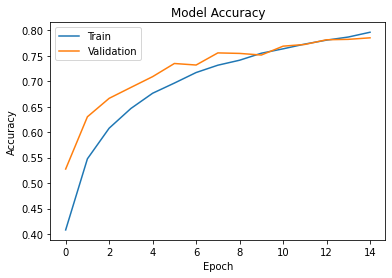

In [39]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
# Display the plot
plt.show()

- The third iteration of this model seems very promising now.
- The validation accuracy has improved substantially and the problem of overfitting has been solved. We can say that the model is giving a generalized performance.
- The above plot shows that the validation accuracy is higher than the training accuracy. There are a few possible reasons for this:
-- The size of the validation set is not big enough.
-- We may have imbalanced data in the validation set.
-- High regularization. If we use regularization methods such as L2, L1, or Dropout, while the model calculates training accuracy it uses a regularized model but when it calculates accuracy on the validation set, it processes the data through an unregularized model. Regularization introduces some noise in loss value during training, because of this the training accuracy decreases more than expected, but while evaluating the model, the model doesn't use regularization, and hence there's no noise, which is why the validation accuracy doesn't decrease.
-- To overcome this, we can try reducing the regularization or increasing the size of the validation set.

## **Transfer Learning**
- Transfer learning is a popular deep learning technique that reuses a pre-trained model on a new problem. It can train deep neural networks with comparatively little data. 

In [40]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [41]:
# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [42]:
# Importing necessary libraries
from tensorflow.keras import Model
from tensorflow.keras.applications.vgg16 import VGG16

 ### **VGG 16 Model**

In [43]:
vgg_model = VGG16(weights = 'imagenet', 
                       include_top = False, 
                       input_shape = (32, 32, 3), pooling = 'max')

58889256/58889256 [==============================] - 0s 0us/step


In [44]:
# Checking summary of the model
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

- The VGG16 model has more than 14.7 M trainable parameters.
- Here, we will not train any of the layers from the VGG16 model. We will use the pre-trained weights and biases.
- Also, we can take any layer's output from the VGG16 model as the input of our new model. Here, we will take the output of the 3rd block of the VGG16 model as the input of our new model.

In [45]:
transfer_layer = vgg_model.get_layer('block3_pool')

In [46]:
vgg_model.trainable = False

In [47]:
# Add classification layers on top of it
x = Flatten()(transfer_layer.output)
x = Dense(256, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation = 'relu')(x)
x = BatchNormalization()(x)
pred = Dense(10, activation = 'softmax')(x)
# Initializing the model
model_4 = Model(vgg_model.input, pred)

In [48]:
# Compiling the model
model_4.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.0005),
              metrics = ['accuracy'])

In [49]:
# Fitting the model
history_4 = model_4.fit(
            x_train_normalized, y_train_encoded,
            epochs = 10,
            batch_size = 250,
            validation_split = 0.1,
            verbose = 2)

Epoch 1/10
180/180 - 346s - loss: 1.4594 - accuracy: 0.5082 - val_loss: 0.9509 - val_accuracy: 0.6804 - 346s/epoch - 2s/step
Epoch 2/10
180/180 - 340s - loss: 1.0198 - accuracy: 0.6568 - val_loss: 0.8393 - val_accuracy: 0.7224 - 340s/epoch - 2s/step
Epoch 3/10
180/180 - 340s - loss: 0.8822 - accuracy: 0.7022 - val_loss: 0.7911 - val_accuracy: 0.7310 - 340s/epoch - 2s/step
Epoch 4/10
180/180 - 342s - loss: 0.8053 - accuracy: 0.7267 - val_loss: 0.7355 - val_accuracy: 0.7448 - 342s/epoch - 2s/step
Epoch 5/10
180/180 - 344s - loss: 0.7407 - accuracy: 0.7477 - val_loss: 0.6964 - val_accuracy: 0.7562 - 344s/epoch - 2s/step
Epoch 6/10
180/180 - 354s - loss: 0.6948 - accuracy: 0.7627 - val_loss: 0.6714 - val_accuracy: 0.7678 - 354s/epoch - 2s/step
Epoch 7/10
180/180 - 356s - loss: 0.6483 - accuracy: 0.7785 - val_loss: 0.6735 - val_accuracy: 0.7688 - 356s/epoch - 2s/step
Epoch 8/10
180/180 - 350s - loss: 0.6171 - accuracy: 0.7892 - val_loss: 0.6738 - val_accuracy: 0.7648 - 350s/epoch - 2s/step


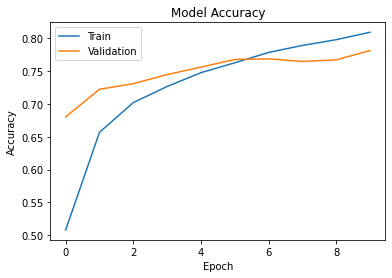

In [50]:
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
# Display the plot
plt.show()

- The model training accuracy is slightly higher than the validation accuracy.
- The validation accuracy has improved in comparison to the previous model.
- We have been able to achieve the best validation accuracy so far without actually training any of the convolutional layers. 

## **Making Predictions**

In [51]:
# Making predictions on the test data
y_pred_test = model_4.predict(x_test_normalized)

# Converting probabilities to class labels
y_pred_test_classes = np.argmax(y_pred_test, axis = 1)

# Calculating the probability of the predicted class
y_pred_test_max_probas = np.max(y_pred_test, axis = 1)

313/313 [==============================] - 72s 231ms/step


              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1000
           1       0.85      0.89      0.87      1000
           2       0.70      0.72      0.71      1000
           3       0.65      0.55      0.59      1000
           4       0.76      0.71      0.74      1000
           5       0.68      0.68      0.68      1000
           6       0.83      0.83      0.83      1000
           7       0.79      0.85      0.82      1000
           8       0.85      0.88      0.86      1000
           9       0.82      0.86      0.84      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



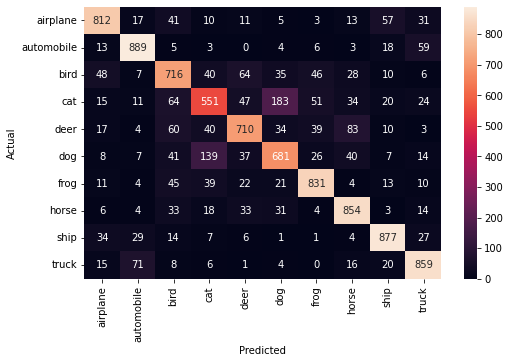

In [52]:
# Importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Printing the classification report
print(classification_report(y_test, y_pred_test_classes))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, y_pred_test_classes)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = cifar10_classes, yticklabels = cifar10_classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
# Display the plot
plt.show()

- The model is giving about 79% accuracy on the test data which is comparable to the accuracy of the validation data. This implies that the model is giving a generalized performance.
- The recall has a high range which implies that the model is good at identifying some objects while poor at identifying some other objects. For example, the model can identify more than 90% of ships but can identify only ~ 54% of cats.
- The model is majorly confused between cats and dogs. This implies that the model might be focused on features related to shapes and sizes but not deep features of objects that can help to distinguish between objects like cats and dogs.
- Consequently, precision also has a high range with the 'cat' class having the least precision.
- The highest precision is for 'automobile' which implies that the model can distinguish automobiles from other objects.

## **Visualizing the predicted images**

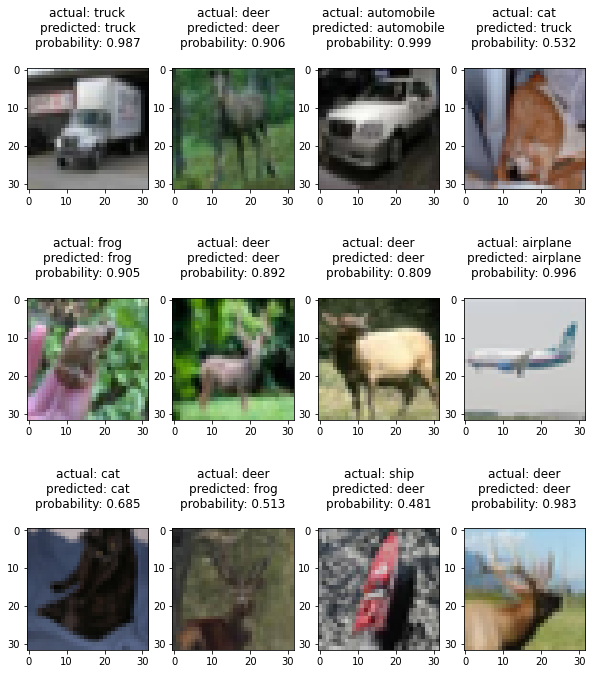

In [53]:
rows = 3
cols = 4

fig = plt.figure(figsize = (10, 12))

for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.imshow(x_test[random_index, :])
        pred_label = cifar10_classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = cifar10_classes[y_test[random_index, 0]]
        ax.set_title("actual: {}\npredicted: {}\nprobability: {:.3}\n".format(
               true_label, pred_label, pred_proba
        ))
        
plt.show()

## **Conclusion**
- prepare the image data before passing it into the CNN model and how to add layers sequentially inside the model.
- We have seen four different iterations of the CNN model and built an intuition about how to improve the model by tuning various hyperparameters and using different techniques.